# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [51]:
import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#from keras.utils import to_categorical

from keras import models
from keras import layers

In [2]:
cars = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
cars.shape

(205, 26)

In [4]:

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
# 2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Text(0.5, 1.0, 'Density or Relative Frequency Of Cars By Price')

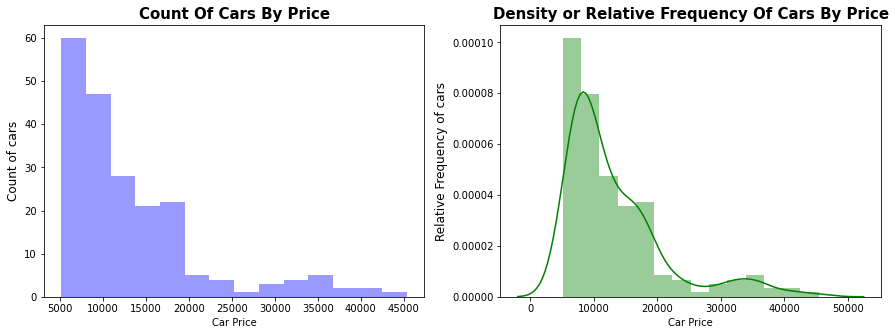

In [7]:
# target variable: price of car

fig, ax= plt.subplots(1,2,figsize=(15,5))

sns.distplot(cars['price'], norm_hist=False, kde=False, ax=ax[0], color='blue')
ax[0].set_xlabel('Car Price')
ax[0].set_ylabel('Count of cars',size=12)
ax[0].set_title('Count Of Cars By Price',size=15,weight="bold")

sns.distplot(cars['price'], kde=True, ax=ax[1], color='green')
ax[1].set_xlabel('Car Price')
ax[1].set_ylabel('Relative Frequency of cars',size=12)
ax[1].set_title('Density or Relative Frequency Of Cars By Price',size=15,weight="bold")

In [8]:
#creating df  with numeric var's only
#cars_numeric=cars.select_dtypes(include=['float64','int64'])
#cars_numeric.head()

In [9]:
# dropping symboling and car_ID as symboling is more of categorical variable as described before and car_ID is only 
#an index type variable and not a predictor
#cars_numeric = cars_numeric.drop(['symboling', 'car_ID'], axis=1)
#cars_numeric.head()

In [10]:
# paiwise scatter plot
#plt.figure(figsize=(20, 10))
#sns.pairplot(cars_numeric)

#as we can see its difficult to interpret these graphs due to so many of them
#a BETTER way of checking linearity is in below cell

In [11]:
#LINEARITY CHECK>>>#to check price has linear relation or not with Indep. var's

#for i, col in enumerate (cars_numeric.columns):
 #   plt.figure(i)
  #  sns.scatterplot(x=cars_numeric[col],y=cars_numeric['price'])

In [12]:
#corr=cars_numeric.corr()

#plt.figure(figsize=(15,8))
#sns.heatmap(corr,annot=True,cmap="YlGnBu")

# Useful insights from Corr Heatmap


 1. <b> Dependent var and indep. var's<b>

> Positive corr: Price highly correlated with enginesize, curbweight, horsepower, carwidth (all of these variables     represent the size/weight/engine power of the car)
    
> Negative corr: Price negatively corr with mpg var's citympg and highwaympg. This suggest that cars having high mileage may fall in the 'economy' cars category or in other words indicates that Low priced cars have mostly high mpg 

2. <b> Correlation among independent variables:<b>

> Many independent variables are highly correlated; wheelbase, carlength, curbweight, enginesize etc. are all measures of         'size/weight', and are positively correlated 


Since indep. var's are highly correlated (more than 80% corr among many of them ) we'll have to pay attention to multicollinearity, which we will check in assumptions validation section using VIF score.

In [13]:
# converting symboling to categorical
cars['symboling'] = cars['symboling'].astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [14]:
#Extracting car names. car name is the first word (before space)
carnames = cars['CarName'].apply(lambda x: x.split(" ")[0])
carnames[:10]

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
5           audi
6           audi
7           audi
8           audi
9           audi
Name: CarName, dtype: object

In [15]:
cars['car_company']=carnames
cars['car_company'].value_counts()

#many car names are duplicates like toyota and toyouta, porsche and porcshce etc.
# we need to fix incorrect spelling and get carnames column in order

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
vw              2
maxda           2
Nissan          1
mercury         1
porcshce        1
vokswagen       1
toyouta         1
Name: car_company, dtype: int64

In [16]:
#volkswagen
cars.loc[(cars['car_company']=="vw")|(cars['car_company']=="vokswagen"),"car_company"]="volkswagen"

#porsche

cars.loc[(cars['car_company']=="porcshce"),"car_company"]="porsche"

#toyota
cars.loc[(cars['car_company']=="toyouta"),"car_company"]="toyota"

# nissan
cars.loc[cars['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
cars.loc[cars['car_company'] == "maxda", 'car_company'] = 'mazda'

cars['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

In [17]:
# drop carname variable
cars = cars.drop('CarName', axis=1)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [18]:
test_data = cars.sample(frac=0.3, random_state=1337)

In [19]:
train_data = cars.drop(test_data.index)

In [20]:
print(
    "Using %d samples for training and %d for validation"
    % (len(train_data), len(test_data))
)

Using 143 samples for training and 62 for validation


In [21]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 35 to 1
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            62 non-null     int64  
 1   symboling         62 non-null     object 
 2   fueltype          62 non-null     object 
 3   aspiration        62 non-null     object 
 4   doornumber        62 non-null     object 
 5   carbody           62 non-null     object 
 6   drivewheel        62 non-null     object 
 7   enginelocation    62 non-null     object 
 8   wheelbase         62 non-null     float64
 9   carlength         62 non-null     float64
 10  carwidth          62 non-null     float64
 11  carheight         62 non-null     float64
 12  curbweight        62 non-null     int64  
 13  enginetype        62 non-null     object 
 14  cylindernumber    62 non-null     object 
 15  enginesize        62 non-null     int64  
 16  fuelsystem        62 non-null     object 
 17 

In [22]:
# def dataframe_to_dataset(dataframe):
#     #df = dataframe.drop(columns=['price','car_ID'])
#     df = dataframe.copy()
#     labels = dataframe['price']
#     ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
#     ds = ds.shuffle(buffer_size=len(df))
#     return ds

In [23]:
# train_ds = dataframe_to_dataset(train_data)
# val_ds = dataframe_to_dataset(val_data)

In [24]:
x_train = train_data.drop(columns=['price',"car_ID"])
y_train = train_data['price']

In [25]:
x_test = test_data.drop(columns=['price',"car_ID"])
y_test = test_data['price']

In [26]:
y_test

35      7295.0
80      9959.0
63     10795.0
107    11900.0
126    32528.0
        ...   
55     10945.0
157     7198.0
101    13499.0
19      6295.0
1      16500.0
Name: price, Length: 62, dtype: float64

In [27]:
train_categorical = x_train.select_dtypes(include=['object'])
train_categorical.head(2)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi


In [28]:
test_categorical = x_test.select_dtypes(include=['object'])
test_categorical.head(2)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
35,0,gas,std,four,sedan,fwd,front,ohc,four,1bbl,honda
80,3,gas,turbo,two,hatchback,fwd,front,ohc,four,spdi,mitsubishi


In [ ]:
# def to_one_hot(labels, dimension=11):
#     results = np.zeros((len(labels), dimension))
#     for i, label in enumerate(labels):
#         results[i, label] = 1.
#     return results
# train_labels = to_one_hot(train_categorical)
# test_labels = to_one_hot(test_categorical)


In [35]:
train_dummies = pd.get_dummies(train_categorical, drop_first=True)
train_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
x_train=x_train.drop(columns=train_categorical)
x_train.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30


In [39]:
df_train = pd.merge(x_train,train_dummies,on=x_train.index)
df_train.columns

Index(['key_0', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'car_company_audi', 'car_company_bmw', 'car_company_buick',
       'car_company_chevrolet', 'car_company_dodge', 'car_co

In [40]:
df_train.drop(columns='key_0',inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 142
Data columns (total 66 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   wheelbase               143 non-null    float64
 1   carlength               143 non-null    float64
 2   carwidth                143 non-null    float64
 3   carheight               143 non-null    float64
 4   curbweight              143 non-null    int64  
 5   enginesize              143 non-null    int64  
 6   boreratio               143 non-null    float64
 7   stroke                  143 non-null    float64
 8   compressionratio        143 non-null    float64
 9   horsepower              143 non-null    int64  
 10  peakrpm                 143 non-null    int64  
 11  citympg                 143 non-null    int64  
 12  highwaympg              143 non-null    int64  
 13  symboling_-1            143 non-null    uint8  
 14  symboling_0             143 non-null    ui

In [41]:
test_dummies = pd.get_dummies(test_categorical, drop_first=True)
test_dummies.head()

,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,...,car_company_mazda,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
35,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
80,0,0,0,1,1,1,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
63,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
107,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
126,0,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
x_test=x_test.drop(columns=test_categorical)
x_test.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
35,96.5,163.4,64.0,54.5,2010,92,2.91,3.41,9.2,76,6000,30,34
80,96.3,173.0,65.4,49.4,2370,110,3.17,3.46,7.5,116,5500,23,30


In [43]:
df_test = pd.merge(x_test,test_dummies,on=x_test.index)
df_test.columns

Index(['key_0', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'car_company_bmw', 'car_company_buick', 'car_company_chevrolet',
       'car_company_dodge', 'car_company_honda', 'car_company_isuzu',
       'car_company_jaguar', 'car

In [44]:
df_test.drop(columns='key_0',inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   wheelbase               62 non-null     float64
 1   carlength               62 non-null     float64
 2   carwidth                62 non-null     float64
 3   carheight               62 non-null     float64
 4   curbweight              62 non-null     int64  
 5   enginesize              62 non-null     int64  
 6   boreratio               62 non-null     float64
 7   stroke                  62 non-null     float64
 8   compressionratio        62 non-null     float64
 9   horsepower              62 non-null     int64  
 10  peakrpm                 62 non-null     int64  
 11  citympg                 62 non-null     int64  
 12  highwaympg              62 non-null     int64  
 13  symboling_0             62 non-null     uint8  
 14  symboling_1             62 non-null     uint

In [45]:
df_train.shape

(143, 66)

In [46]:
df_test.shape

(62, 60)

In [53]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(df_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
   # model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [54]:
import numpy as np
k=3
num_val_samples = len(df_train) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = df_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [df_train[:i * num_val_samples],
    df_train[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [y_train[:i * num_val_samples],
    y_train[(i + 1) * num_val_samples:]],
    axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 1)
    all_scores.append(val_mae)

processing fold # 0
2/2 [==============================] - 0s 16ms/step - loss: 31020490.0000 - mae: 3875.0845
processing fold # 1
2/2 [==============================] - 0s 2ms/step - loss: 31727758.0000 - mae: 3821.5586
processing fold # 2
2/2 [==============================] - 0s 16ms/step - loss: 11192466.0000 - mae: 2858.4446


In [55]:
all_scores

[3875.08447265625, 3821.55859375, 2858.444580078125]

In [56]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = df_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [df_train[:i * num_val_samples],
    df_train[(i + 1) * num_val_samples:]],
    axis=0)   
    partial_train_targets = np.concatenate(
    [y_train[:i * num_val_samples],
    y_train[(i + 1) * num_val_samples:]],
    axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2


In [61]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

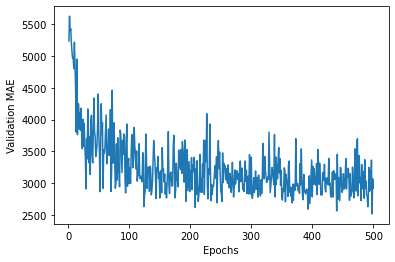

In [62]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [66]:
model = build_model()
model.fit(df_train, y_train,epochs=100, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(df_test, y_test)

ValueError: in user code:

    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1233 test_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1217 run_step  **
        outputs = model.test_step(data)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1183 test_step
        y_pred = self(x, training=False)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_9 is incompatible with the layer: expected axis -1 of input shape to have value 66 but received input with shape (None, 60)


In [64]:
df_test.shape

(62, 60)